In [ ]:
from google.colab import drive # Интеграция с гугл-диском
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
df_star = pd.read_csv('/content/gdrive/MyDrive/Dataset/tripadvisor_hotel_reviews.csv')

In [ ]:
df_star

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
df_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# import plotly.graph_objects as go
# import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# from nltk.tokenize import word_tokenize as wt
# from collections import Counter
import gensim
# import textblob
import spacy
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM, Bidirectional

In [ ]:
df_star.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [ ]:
from sklearn.utils import resample

In [ ]:
rubric_0 = df_star[df_star['Rating']==1]

In [ ]:
rubric_1 = df_star[df_star['Rating']==2]

In [ ]:
rubric_2 = df_star[df_star['Rating']==3]

In [ ]:
rubric_3 = df_star[df_star['Rating']==4]

In [ ]:
rubric_4 = df_star[df_star['Rating']==5]

In [ ]:
rubric_0_upsample = resample(rubric_0,
             replace=True,
             n_samples=len(rubric_2),
             random_state=42)

In [ ]:
rubric_1_upsample = resample(rubric_1,
             replace=True,
             n_samples=len(rubric_2),
             random_state=42)

In [ ]:
rubric_2_upsample = resample(rubric_2,
             replace=True,
             n_samples=len(rubric_2),
             random_state=42)

In [ ]:
rubric_3_downsample = resample(rubric_3,
             replace=True,
             n_samples=len(rubric_2),
             random_state=42)

In [ ]:
rubric_4_downsample = resample(rubric_4,
             replace=True,
             n_samples=len(rubric_2),
             random_state=42)

In [ ]:
rubric_4_downsample

,Review,Rating
16867,"great option try, husband great week-long stay...",5
2162,"cool, staff location hotel great, reasonably p...",5
12971,"great decor, love boutique hotels usually n't ...",5
12441,"perfect essence festival, attending essence fe...",5
13683,great lower manhattan location great location ...,5
...,...,...
14982,excellent hotel stayed read reviews posted dec...,5
6732,highly recommend stayed resort march called gl...,5
9304,happy hotel necessary qulifications pleasant s...,5
18620,dreams reality arrival airport unaware wonderf...,5


In [ ]:
df_star = pd.concat([rubric_0_upsample, rubric_1_upsample, rubric_2_upsample, rubric_3_downsample, rubric_4_downsample]).sample(frac=1).reset_index(drop=True)

In [ ]:
df_star

,Review,Rating,review_clean,review_tokenized,review_joined,positive
0,returned hong kong today 2 march 05 othe peopl...,3,returned hong kong today march othe people s...,"[return, hong, kong, today, march, othe, peopl...",return hong kong today march othe people state...,1
1,"not rent resort villa rentals, rented ocean vi...",1,not rent resort villa rentals rented ocean vi...,"[rent, resort, villa, rental, rent, ocean, vil...",rent resort villa rental rent ocean villa reso...,0
2,brilliant time brilliant hotel got really good...,4,brilliant time brilliant hotel got really good...,"[brilliant, time, brilliant, hotel, get, good,...",brilliant time brilliant hotel get good deal h...,1
3,nice not recommend enthusiastically porta faen...,4,nice not recommend enthusiastically porta faen...,"[nice, recommend, enthusiastically, porta, fae...",nice recommend enthusiastically porta faenza w...,1
4,fantastic hotet just returned 3 night stay hot...,5,fantastic hotet just returned night stay hote...,"[fantastic, hotet, return, night, stay, hotel,...",fantastic hotet return night stay hotel fantas...,1
...,...,...,...,...,...,...
10915,"not impressive, husband attending conference h...",3,not impressive husband attending conference h...,"[impressive, husband, attend, conference, hote...",impressive husband attend conference hotel cho...,1
10916,trip pr definitely not booked minute 4-day tri...,3,trip pr definitely not booked minute day trip...,"[trip, pr, definitely, book, minute, day, trip...",trip pr definitely book minute day trip boyfri...,1
10917,amazing beautiful handsome hotel mr. o took be...,5,amazing beautiful handsome hotel mr o took be...,"[amazing, beautiful, handsome, hotel, mr, take...",amazing beautiful handsome hotel mr take berli...,1
10918,pay stayed rivoli ramblas hotel feb 05. got de...,3,pay stayed rivoli ramblas hotel feb got deal...,"[pay, stay, rivoli, ramblas, hotel, feb, get, ...",pay stay rivoli ramblas hotel feb get deal exp...,1


In [ ]:
df_star.Rating.value_counts()

3    2184
1    2184
4    2184
5    2184
2    2184
Name: Rating, dtype: int64

In [ ]:
def positive(rating):
    if rating < 3:
        return 0
    else:
        return 1

In [ ]:
df_star['positive'] = df_star.Rating.apply(positive)

In [ ]:
import re
import string

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
all_stopwords = STOP_WORDS

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_star['review_clean']=df_star['Review'].apply(clean_text)

In [ ]:
df_star

,Review,Rating,review_clean,review_tokenized
0,returned hong kong today 2 march 05 othe peopl...,3,returned hong kong today march othe people s...,"[return, hong, kong, today, , march, , othe,..."
1,"not rent resort villa rentals, rented ocean vi...",1,not rent resort villa rentals rented ocean vi...,"[rent, resort, villa, rental, , rent, ocean, ..."
2,brilliant time brilliant hotel got really good...,4,brilliant time brilliant hotel got really good...,"[brilliant, time, brilliant, hotel, get, good,..."
3,nice not recommend enthusiastically porta faen...,4,nice not recommend enthusiastically porta faen...,"[nice, recommend, enthusiastically, porta, fae..."
4,fantastic hotet just returned 3 night stay hot...,5,fantastic hotet just returned night stay hote...,"[fantastic, hotet, return, , night, stay, hot..."
...,...,...,...,...
10915,"not impressive, husband attending conference h...",3,not impressive husband attending conference h...,"[impressive, , husband, attend, conference, h..."
10916,trip pr definitely not booked minute 4-day tri...,3,trip pr definitely not booked minute day trip...,"[trip, pr, definitely, book, minute, , day, t..."
10917,amazing beautiful handsome hotel mr. o took be...,5,amazing beautiful handsome hotel mr o took be...,"[amazing, beautiful, handsome, hotel, mr, , o..."
10918,pay stayed rivoli ramblas hotel feb 05. got de...,3,pay stayed rivoli ramblas hotel feb got deal...,"[pay, stay, rivoli, ramblas, hotel, feb, , g..."


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def spacy_tokeniser(text):
    text = text.strip().lower()
    doc = nlp(text)
    mytokens = [token.lemma_ for token in doc if token.text not in all_stopwords]
    return mytokens

In [ ]:
df_star['review_tokenized']=df_star['review_clean'].apply(spacy_tokeniser)

In [ ]:
from nltk.probability import FreqDist
import nltk

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase:
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

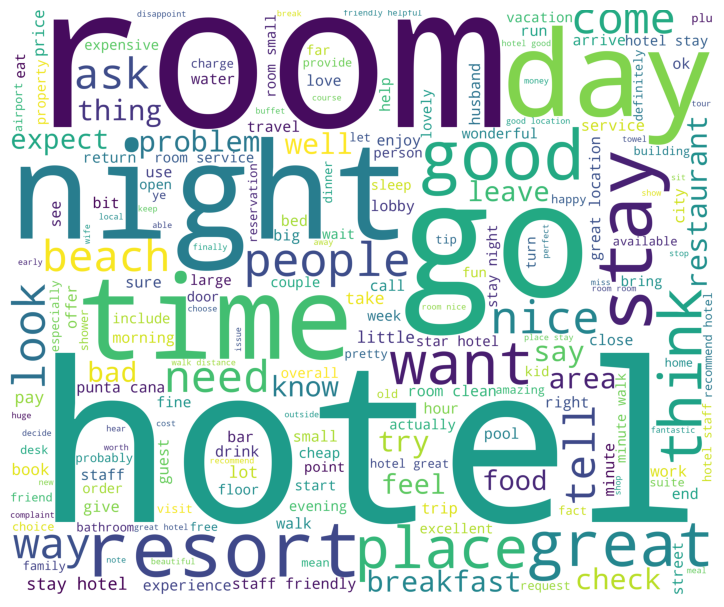

In [ ]:
corpus = get_corpus(df_star['review_tokenized'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [ ]:
freq = nltk.FreqDist(corpus)

In [ ]:
freq.most_common(10)

[('room', 28849),
 ('hotel', 28848),
 ('stay', 14866),
 ('good', 11489),
 ('great', 8845),
 ('staff', 8391),
 ('night', 8350),
 ('day', 8077),
 ('nice', 6943),
 ('time', 6848)]

In [ ]:
def space_cleaner(text):
    text_clean = []

    for x in text:
        x = x.replace(" ", "")
        if ' ' not in x and len(x)>1:
            text_clean.append(x)
    return text_clean

In [ ]:
df_star.review_tokenized = df_star.review_tokenized.apply(space_cleaner)

In [ ]:
freq_1 = nltk.FreqDist(get_corpus(df_star['review_tokenized'][df_star['Rating']==1].values))

In [ ]:
freq_1.most_common(10)

[('room', 6509),
 ('hotel', 6057),
 ('stay', 3082),
 ('day', 1893),
 ('night', 1809),
 ('staff', 1521),
 ('service', 1431),
 ('tell', 1367),
 ('time', 1358),
 ('good', 1340)]

In [ ]:
freq_2 = nltk.FreqDist(get_corpus(df_star['review_tokenized'][df_star['Rating']==2].values))

In [ ]:
freq_2.most_common(10)

[('room', 6850),
 ('hotel', 5654),
 ('stay', 3119),
 ('good', 2230),
 ('night', 1909),
 ('day', 1893),
 ('service', 1616),
 ('staff', 1578),
 ('time', 1555),
 ('food', 1375)]

In [ ]:
freq_3 = nltk.FreqDist(get_corpus(df_star['review_tokenized'][df_star['Rating']==3].values))

In [ ]:
freq_4 = nltk.FreqDist(get_corpus(df_star['review_tokenized'][df_star['Rating']==4].values))

In [ ]:
freq_5 = nltk.FreqDist(get_corpus(df_star['review_tokenized'][df_star['Rating']==5].values))

In [ ]:
freq_3.most_common(10)

[('room', 6239),
 ('hotel', 5693),
 ('good', 2929),
 ('stay', 2801),
 ('nice', 1949),
 ('night', 1824),
 ('great', 1773),
 ('staff', 1570),
 ('day', 1565),
 ('location', 1515)]

In [ ]:
freq_4.most_common(10)

[('hotel', 5557),
 ('room', 5126),
 ('good', 2916),
 ('stay', 2856),
 ('great', 2823),
 ('nice', 1841),
 ('staff', 1764),
 ('night', 1549),
 ('day', 1487),
 ('location', 1460)]

In [ ]:
freq_5.most_common(10)

[('hotel', 5887),
 ('room', 4125),
 ('stay', 3008),
 ('great', 2577),
 ('good', 2074),
 ('staff', 1958),
 ('night', 1259),
 ('day', 1239),
 ('nice', 1178),
 ('location', 1177)]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
def join_list(text):
    return ' '.join(text)

In [ ]:
df_star['review_joined'] = df_star.review_tokenized.apply(join_list)

In [ ]:
x = df_star['review_joined']
y = df_star.Rating

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=47)

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(random_state = 7,  max_iter = 50, C = 0.16)
log.fit(tfidf_train, y_train.values.ravel())

LogisticRegression(C=0.16, max_iter=50, random_state=7)

In [ ]:
y_pred = log.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 62.13%


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
gbm = LGBMClassifier()
gbm.fit(tfidf_train, y_train.values.ravel())

LGBMClassifier()

In [ ]:
y_pred = gbm.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 74.4%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(tfidf_train, y_train.values.ravel())

GradientBoostingClassifier()

In [ ]:
y_pred = gbc.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 61.86%


In [ ]:
pac = PassiveAggressiveClassifier(random_state = 7, loss = 'squared_hinge',  max_iter = 50, C = 0.16)
pac.fit(tfidf_train, y_train.values.ravel())

PassiveAggressiveClassifier(C=0.16, loss='squared_hinge', max_iter=50,
                            random_state=7)

In [ ]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 71.29%


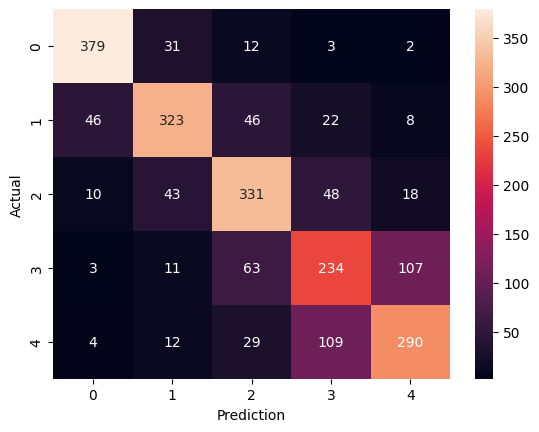

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d")
sns.set_theme(style='white')
ax.set(xlabel='Prediction', ylabel='Actual')
plt.show()

In [ ]:
x = df_star['review_joined']
y = df_star.positive

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=47)

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)

In [ ]:
pac = PassiveAggressiveClassifier(random_state = 7, loss = 'squared_hinge',  max_iter = 50, C = 0.16)
pac.fit(tfidf_train, y_train.values.ravel())

PassiveAggressiveClassifier(C=0.16, loss='squared_hinge', max_iter=50,
                            random_state=7)

In [ ]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 94.09%


In [ ]:
gbm = LGBMClassifier()
gbm.fit(tfidf_train, y_train.values.ravel())

LGBMClassifier()

In [ ]:
y_pred = gbm.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 92.86%
